In [1]:
#In this notebook I do some EDA. I found myself going back to my wrangling notebook quite a few times over the course of this 
#exploration, to make adjustments as I came to understand my data better.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_dating_data.csv')
df_ethnicity = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_ethnicity_data.csv')
df_language = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_language_data.csv')

In [4]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,job,offspring,pets,religion,sign,smokes
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,75.0,transportation,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,just specified,sometimes
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,70.0,hospitality / travel,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,just specified,no
2,38,available,m,straight,thin,anything,socially,unspecified,graduated from masters program,68.0,rather not say,NaN,has cats,unspecified,does not care,no
3,23,single,m,straight,thin,vegetarian,socially,unspecified,working on college/university,71.0,student,doesn't want kids,likes cats,unspecified,just specified,no
4,29,single,m,straight,athletic,anything,socially,never,graduated from college/university,66.0,artistic / musical / writer,NaN,likes dogs and likes cats,unspecified,just specified,no


In [5]:
#This isn't particularly relevant, but felt wrong to not make a .corr() plot at least once.
df.corr()

,age,height
age,1.000000,-0.025128
height,-0.025128,1.000000


(array([ 3787.,     0., 43895.,     0.,     0.,  3040.,     0.,  2231.,
            0.,  1480.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

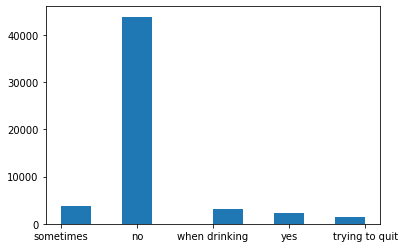

In [6]:
plt.hist(df['smokes'])

(array([ 1600., 11291.,  8509.,  6138., 10542.,  6520.,  5463.,  1721.,
         1947.,   702.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

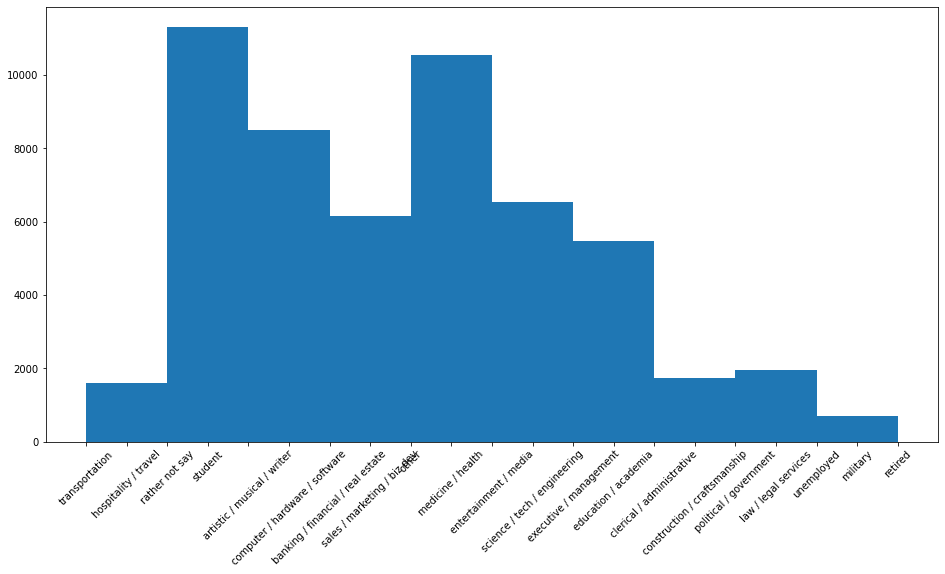

In [7]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.hist(df['job'])

Text(0.5, 1.0, 'sign')

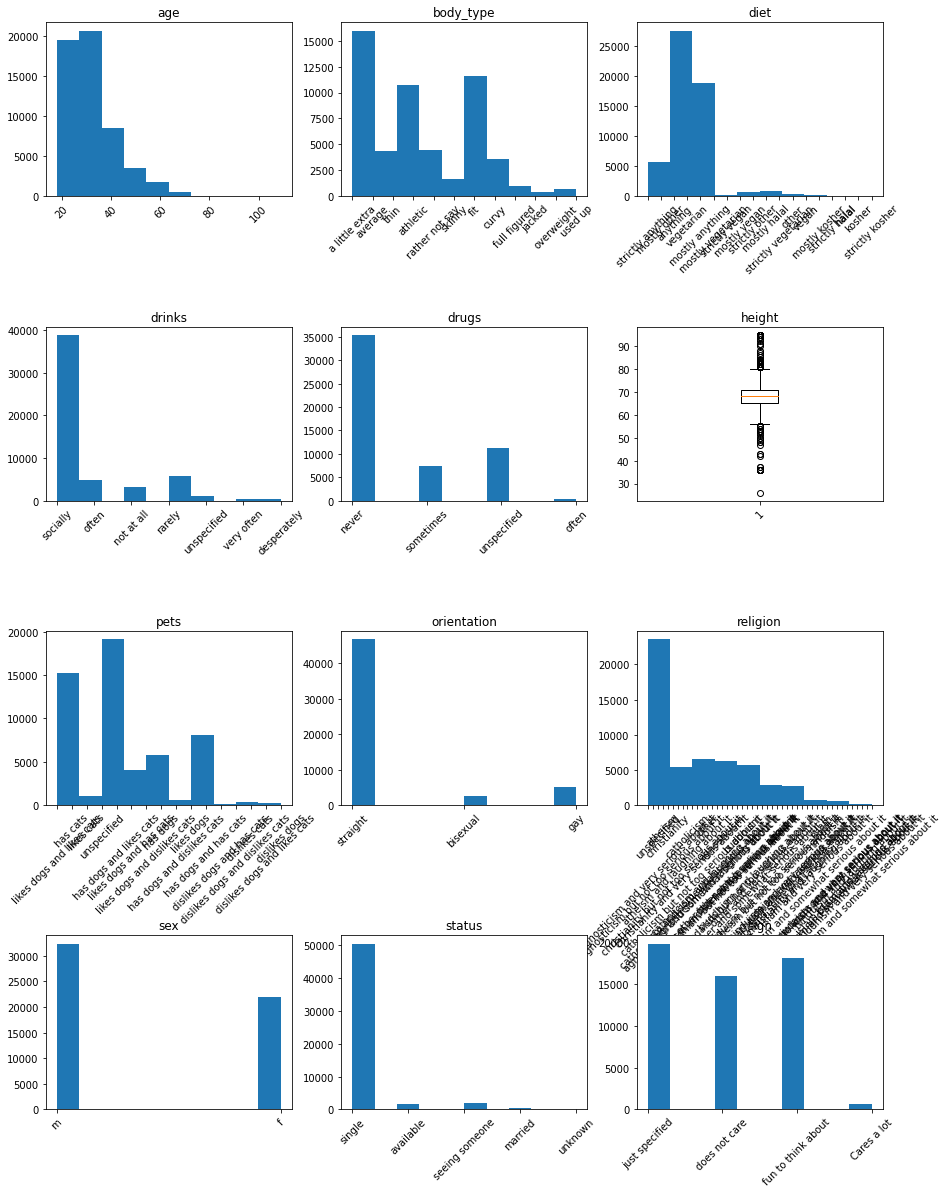

In [8]:
#Simple plotting of our categorical variables. Exploring the distributions. This lead to me simplifying the sign category, and 
#accepting the complexity for other columns like Education and Religion that weren't as easily decomposed while preserving their
#meaning.
fig, axs = plt.subplots(4,3,figsize=(15,20))
plt.subplots_adjust(hspace=.75)

axs[0,0].hist(df.age)
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].set_title('age')

axs[0,1].hist(df.body_type)
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].set_title('body_type')

axs[0,2].hist(df.diet)
axs[0,2].tick_params(axis='x', rotation=45)
axs[0,2].set_title('diet')

axs[1,0].hist(df.drinks)
axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].set_title('drinks')

axs[1,1].hist(df.drugs)
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_title('drugs')

axs[1,2].boxplot(df.height)
axs[1,2].tick_params(axis='x', rotation=45)
axs[1,2].set_title('height')

axs[2,0].hist(df.pets)
axs[2,0].tick_params(axis='x', rotation=45)
axs[2,0].set_title('pets')

axs[2,1].hist(df.orientation)
axs[2,1].tick_params(axis='x', rotation=45)
axs[2,1].set_title('orientation')

axs[2,2].hist(df.religion)
axs[2,2].tick_params(axis='x', rotation=45)
axs[2,2].set_title('religion')

axs[3,0].hist(df.sex)
axs[3,0].tick_params(axis='x', rotation=45)
axs[3,0].set_title('sex')

axs[3,1].hist(df.status)
axs[3,1].tick_params(axis='x', rotation=45)
axs[3,1].set_title('status')

axs[3,2].hist(df.sign)
axs[3,2].tick_params(axis='x', rotation=45)
axs[3,2].set_title('sign')


In [9]:
#That religion category is really crowded, let's take a closer look.
laughing = []
serious = []
other = []
for unique in df.religion.unique():
    if unique.find('laughing') != -1:
        laughing.append(unique)
    elif unique.find('serious') != -1:    
        serious.append(unique)
    else:
        other.append(unique)

In [10]:
print(laughing)

['atheism and laughing about it', 'catholicism and laughing about it', 'agnosticism and laughing about it', 'other and laughing about it', 'buddhism and laughing about it', 'judaism and laughing about it', 'christianity and laughing about it', 'hinduism and laughing about it', 'islam and laughing about it']


In [11]:
print(serious)

['agnosticism and very serious about it', 'agnosticism but not too serious about it', 'christianity but not too serious about it', 'christianity and very serious about it', 'catholicism but not too serious about it', 'catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'atheism and somewhat serious about it', 'buddhism but not too serious about it', 'other but not too serious about it', 'judaism but not too serious about it', 'other and somewhat serious about it', 'other and very serious about it', 'hinduism but not too serious about it', 'atheism but not too serious about it', 'christianity and somewhat serious about it', 'hinduism and very serious about it', 'atheism and very serious about it', 'buddhism and somewhat serious about it', 'islam and very serious about it', 'judaism and somewhat serious about it', 'catholicism and very serious about it', 'judaism and very serious about it', 'hinduism and somewhat serious about it', 'islam but not too 

In [12]:
very = []
notserious = []
somewhat = []

for each in serious:
    if each.find('very') != -1:
        very.append(each)
    elif each.find('not') != -1:
        notserious.append(each)
    else:
        somewhat.append(each)
print(very)
print('SPACER')
print(notserious)
print('SPACER')
print(somewhat)



['agnosticism and very serious about it', 'christianity and very serious about it', 'other and very serious about it', 'hinduism and very serious about it', 'atheism and very serious about it', 'islam and very serious about it', 'catholicism and very serious about it', 'judaism and very serious about it', 'buddhism and very serious about it']
SPACER
['agnosticism but not too serious about it', 'christianity but not too serious about it', 'catholicism but not too serious about it', 'buddhism but not too serious about it', 'other but not too serious about it', 'judaism but not too serious about it', 'hinduism but not too serious about it', 'atheism but not too serious about it', 'islam but not too serious about it']
SPACER
['catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'atheism and somewhat serious about it', 'other and somewhat serious about it', 'christianity and somewhat serious about it', 'buddhism and somewhat serious about it', 'judaism a

In [13]:
print(other)

['unspecified', 'atheism', 'christianity', 'catholicism', 'other', 'agnosticism', 'buddhism', 'judaism', 'islam', 'hinduism']


In [14]:
#so we have seven religions plus an other and unspecified, and for each religion we have four levels of seirousness. 
#Laughing, Not very, Vanilla, and Very. THere's a lot of density here, and I've got an impulse to simplifiy, but we have a 
#decent number of members in every category. We'll see if the modelling stage applies pressure for us to simplify this at all.
#But for now we'll leave it

In [15]:
#The education category is very crowded as well. Let's take a deeper look at it
graduated = []
working_on = []
dropped_out = []
other = []
for unique in df.education.unique():
    if unique.find('graduated') != -1:
        graduated.append(unique)
    elif unique.find('dropped') != -1:
        dropped_out.append(unique)
    elif unique.find('working') != -1:
        working_on.append(unique)
    else:
        other.append(unique)

print(graduated)
print(len(graduated))
print('SPACER')
print(working_on)
print(len(working_on))
print('SPACER')
print(dropped_out)
print(len(dropped_out))
print('SPACER')
print(other)
print(len(other))

['graduated from masters program', 'graduated from college/university', 'graduated from high school', 'graduated from space camp', 'graduated from ph.d program', 'graduated from law school', 'graduated from two-year college', 'graduated from med school']
8
SPACER
['working on college/university', 'working on space camp', 'working on two-year college', 'working on masters program', 'working on ph.d program', 'working on med school', 'working on high school', 'working on law school']
8
SPACER
['dropped out of space camp', 'dropped out of college/university', 'dropped out of high school', 'dropped out of ph.d program', 'dropped out of two-year college', 'dropped out of masters program', 'dropped out of med school', 'dropped out of law school']
8
SPACER
['unspecified', 'college/university', 'two-year college', 'high school', 'law school', 'masters program', 'space camp', 'ph.d program', 'med school']
9


In [16]:
#Eight caetgories, with four levels a piece, and one for unspecified. 
#about half of our data is contained iwthin the first four categories ['graduated from college/university', 
#'graduated form masters program', 'working on college/university', 'unspecified']
#Might want to prune this later, but as it stands it's hard to justify cutting out what could be meaningful distinctions

In [17]:
print(df['smokes'].unique())

['sometimes' 'no' 'when drinking' 'yes' 'trying to quit']


In [18]:
list_of_jobs = list(df['job'].unique())
employed_smokers = pd.DataFrame()
for i in list_of_jobs:
    employed_smokers[i] = np.nan

In [19]:
employed_smokers.head()

,transportation,hospitality / travel,rather not say,student,artistic / musical / writer,computer / hardware / software,banking / financial / real estate,sales / marketing / biz dev,other,medicine / health,...,science / tech / engineering,executive / management,education / academia,clerical / administrative,construction / craftsmanship,political / government,law / legal services,unemployed,military,retired


In [20]:
job_smoke_dict = {}
for x in df.index:
    if df['job'].get(x) not in job_smoke_dict.keys():
        job_smoke_dict[df['job'].get(x)] = []
    job_smoke_dict[df['job'].get(x)].append(df['smokes'].get(x))

In [21]:
employed_smokers = pd.DataFrame.from_dict(job_smoke_dict, orient='index').transpose()

In [22]:
employed_smokers.head()

,transportation,hospitality / travel,rather not say,student,artistic / musical / writer,computer / hardware / software,banking / financial / real estate,sales / marketing / biz dev,other,medicine / health,...,science / tech / engineering,executive / management,education / academia,clerical / administrative,construction / craftsmanship,political / government,law / legal services,unemployed,military,retired
0,sometimes,no,no,no,no,no,no,no,no,no,...,no,no,no,trying to quit,no,no,no,no,no,no
1,no,no,when drinking,no,no,no,no,no,no,no,...,no,no,sometimes,no,no,no,no,no,no,trying to quit
2,no,no,yes,no,sometimes,no,no,no,no,no,...,when drinking,no,no,no,no,no,no,yes,trying to quit,no
3,no,no,no,no,no,no,trying to quit,no,trying to quit,no,...,no,no,no,no,no,sometimes,no,no,no,no
4,sometimes,no,no,sometimes,no,no,no,yes,no,sometimes,...,no,no,no,no,no,no,no,no,no,no


In [ ]:
#We find relatively constant ratios of job to smoking displayed here. There's a little variation, some of the more extreme 
#examples have been plotted below. But they all share the general shape of a lot of No's and a then a smattering of the other
#answers

#The below is functional, but has been commented out to save our esteemed readers the trouble of scrolling for pages upon pages.
#for column in employed_smokers.columns:
#    print(employed_smokers[column].value_counts())
#    print("")


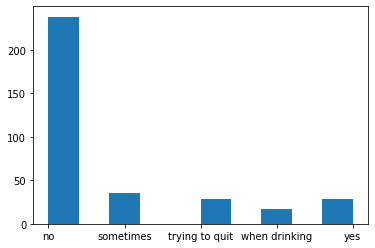

In [24]:
plt.hist(sorted(job_smoke_dict['transportation']))
plt.show()

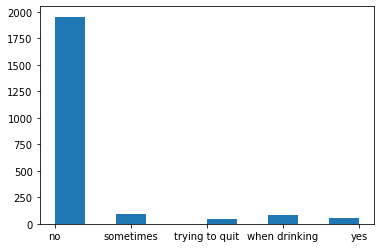

In [38]:
plt.hist(sorted(job_smoke_dict['executive / management']))
plt.show()

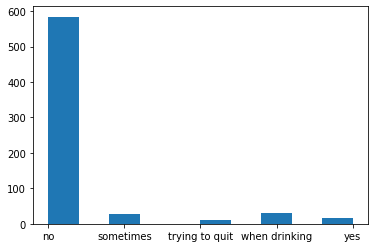

In [26]:
plt.hist(sorted(job_smoke_dict['political / government']))
plt.show()

In [27]:
df.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       'unspecified', 'graduated from high school',
       'working on masters program', 'graduated from space camp',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'college/university', 'two-year college', 'working on med school',
       'dropped out of college/university',
       'graduated from two-year college', 'dropped out of high school',
       'working on high school', 'dropped out of ph.d program',
       'dropped out of two-year college', 'high school',
       'graduated from med school', 'working on law school', 'law school',
       'masters program', 'space camp', 'dropped out of masters program',
       'ph.d program', 'dropped out of med school',
       'dropped out of law school', 'med school'], dtype=ob

(array([36036.,  7466.,  2640.,  3145.,  1100.,  2606.,   395.,   681.,
          307.,    57.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

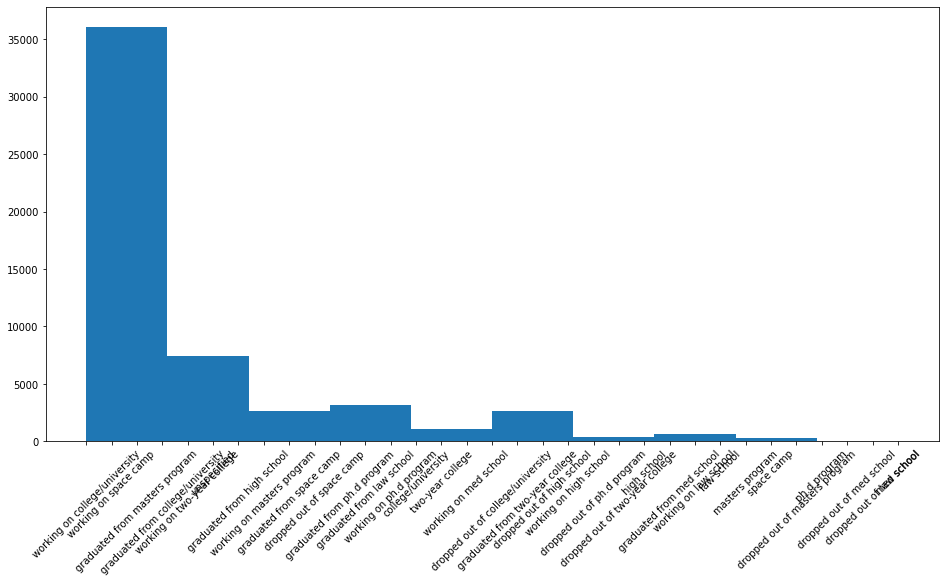

In [28]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.hist(df.education)

In [ ]:
#Our two biggest categories of education have almost identical relationships with smoking. Which is interesting.

In [94]:
education_smoke_dict = {}
for x in df.index:
    if df['education'].get(x) not in education_smoke_dict.keys():
        education_smoke_dict[df['education'].get(x)] = []
    education_smoke_dict[df['education'].get(x)].append(df['smokes'].get(x))

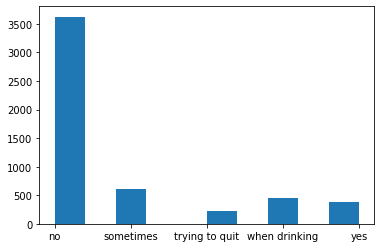

In [102]:
plt.hist(sorted(education_smoke_dict['working on college/university']))
plt.show()

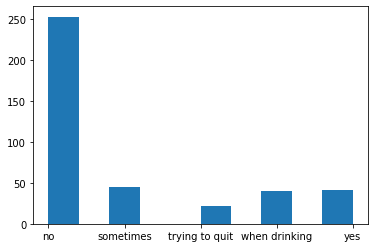

In [103]:
plt.hist(sorted(education_smoke_dict['working on space camp']))
plt.show()

In [39]:
#The below was useful for me, but produces about nine pages of graphs, and I'll save you the trouble of scrolling throuhg that.

#Every single language category has at least a few fluents. I'm tempted to group some languages to reduce dimensionality,
#but given that almost all of these are real langauges, the only really debatable item being c++ it seems imprudent to 
#remove them from the feature set.


#print(len(df_language.columns))
#fig, axs = plt.subplots(26,3,figsize=(12,200))
#plt.subplots_adjust(hspace=1)
#axrow =0
#axcolumn = 0


#for col_name in df_language.columns:
#    non_zero_mask = df_language[col_name] > 0
#    axs[axrow, axcolumn].hist(df_language.loc[non_zero_mask, col_name])
#    axs[axrow, axcolumn].set_title(col_name)
#    axcolumn += 1
#    if axcolumn > 2:
#        axcolumn = 0
#        axrow += 1

In [30]:
#Most of our speakers speak english fluently.
print(df_language['english'].value_counts())

3    58230
2     1067
1      599
0       50
Name: english, dtype: int64


In [31]:
print(df_language.shape)

(59946, 77)


In [44]:
df_language['multifluent_score'] = df_language.apply(np.sum, axis=1)

In [47]:
#Each language had three fluency options, barely, mostly, and fluent, translated to 1,2 and 3 respectively.
#It's remarkable to me that nearly half of the people in our data have a sore of 9!
df_language.multifluent_score.value_counts()

9     28855
18     8684
15     7126
12     5632
21     2917
24     2169
27     1951
30      697
36      454
33      397
6       376
3       315
39      123
45      113
42       72
0        50
54        7
48        7
51        1
Name: multifluent_score, dtype: int64

In [54]:
df_language["num_spoken"] = df_language.astype(bool).apply(np.sum, axis=1)
df_language.num_spoken.value_counts()

3    29299
4    17123
5     8610
6     3233
7     1553
8       78
0       50
Name: num_spoken, dtype: int64

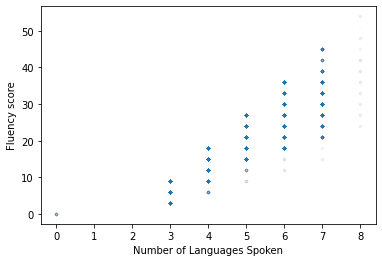

In [74]:
plt.plot(df_language.num_spoken, df_language.multifluent_score, linestyle='none', marker='.', alpha=.006)
plt.xlabel('Number of Languages Spoken')
plt.ylabel('Fluency score')
plt.show()

In [99]:
test_df = df_language.head(100)

c:\users\prathmun\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\prathmun\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


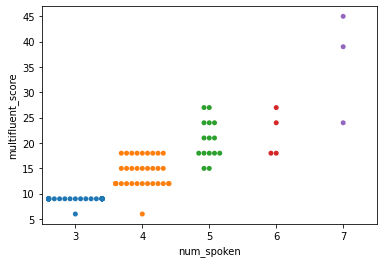

In [101]:
import seaborn as sns
sns.swarmplot(x='num_spoken', y='multifluent_score', data=test_df)
plt.show()

In [32]:
non_english_fluents = 0
for each in df_language.columns:
    if each != 'english':
        count_series = df_language[each].value_counts()
        non_english_fluents += count_series[3]
print('About ', round(non_english_fluents/59946, 2), 'instances of non-english fluency occur')



About  0.26 instances of non-english fluency occur


In [33]:
df_ethnicity.head()

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0


In [34]:
df_ethnicity.sum(axis=0)

asian                8205
white               37882
black                3328
other                3567
hispanic / latin     5357
pacific islander     1473
native american      1265
middle eastern        950
indian               1449
dtype: int64

In [35]:
df_ethnicity['ethnicity_multiplicity'] = df_ethnicity.apply(np.sum, axis=1)

In [36]:
df_ethnicity.head()

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian,ethnicity_multiplicity
0,1,1,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1
4,1,0,1,1,0,0,0,0,0,3


In [37]:
df_ethnicity.ethnicity_multiplicity.value_counts()

1    47407
0     5680
2     5412
3     1050
4      234
9       66
5       55
6       18
8       14
7       10
Name: ethnicity_multiplicity, dtype: int64